In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from plot_utils import plot_scatter_alt_vs_min, plot_boxplot_alt_vs_min

In [2]:
BASE_DIR = Path.cwd().parent.parent

# Resultados limitando a 10 resultados por query
RESULTS_PATH = BASE_DIR / "intersection_statistics.csv"
assert RESULTS_PATH.exists(), f"Results file not found at {RESULTS_PATH}"

In [3]:
df = pd.read_csv(RESULTS_PATH)

df["intersected_list_sizes"] = df["intersected_list_sizes"].apply(lambda x: [int(size) for size in x.split(";")])
df["q * min"] = df["intersected_list_sizes"].apply(min) * df["intersected_list_sizes"].apply(len)
df["δ * log2(min)"] = df["alternation_complexity"] * np.log2(df["intersected_list_sizes"].apply(min).replace(1, 2))
df["δ * log2(max)"] = df["alternation_complexity"] * np.log2(df["intersected_list_sizes"].apply(max))

df = df[["query_text", "alternation_complexity", "q * min", "δ * log2(min)", "δ * log2(max)", "intersected_list_sizes"]]

display(df.head())
print(f"Total de intersecciones: {len(df)}")
print(f"Total de queries: {df['query_text'].nunique()}")


,query_text,alternation_complexity,q * min,δ * log2(min),δ * log2(max),intersected_list_sizes
0,?x1 353 ?x2 . ?x2 226 ?x3 . ?x3 377 ?x4 . ?x1 ...,48,156,301.699307,306.001893,"[83, 78]"
1,?x1 1734 ?x2 . ?x2 2059 ?x3,3147,7318,37251.774455,47428.837062,"[34424, 3659]"
2,?x1 322 ?x2 . ?x1 541 ?x3 . ?x2 2059 ?x4 . ?x3...,3935,7318,46579.514611,63866.681216,"[76885, 3659]"
3,?x1 1652 ?x2 . ?x2 2027 ?x3 . ?x3 290 ?x4 . ?x...,60,126,358.636795,580.874305,"[821, 63]"
4,?y 1259 ?x . ?z 820 ?x,945,2810,9881.254922,12544.562528,"[1405, 9910]"


Total de intersecciones: 12788
Total de queries: 841


In [4]:
errors = df[df["alternation_complexity"] > df["q * min"]]
diffs = errors["alternation_complexity"] - errors["q * min"]
diffs.describe()

count    11900.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
dtype: float64

In [5]:
df.describe(percentiles=[0.25, 0.75, 0.9, 0.95, 0.97, 0.99, 0.999]).T.round(2)

,count,mean,std,min,25%,50%,75%,90%,95%,97%,99%,99.9%,max
alternation_complexity,12788.0,83.54,2479.86,2.00,3.0,3.00,3.00,3.00,45.00,239.00,1106.56,8680.91,262764.00
q * min,12788.0,376.38,18818.07,2.00,2.0,2.00,2.00,2.00,138.60,752.78,4931.36,27740.87,2101134.00
δ * log2(min),12788.0,1156.92,48214.87,2.00,3.0,3.00,3.00,3.00,254.26,1974.34,11715.00,111854.23,5255999.12
δ * log2(max),12788.0,1546.74,58362.79,9.51,47.6,48.69,48.69,56.44,542.58,3136.85,17547.62,155709.83,6275635.54


In [6]:
df["(q * min) - (δ * log2(min))"] = df["q * min"] - df["δ * log2(min)"]
df["(q * min) - (δ * log2(max))"] = df["q * min"] - df["δ * log2(max)"]

df[["(q * min) - (δ * log2(min))", "(q * min) - (δ * log2(max))"]].describe(
    percentiles=[0.01, 0.05, 0.1, 0.97, 0.99, 0.995, 0.999]
).T.round(2).drop(columns=["count", "std"])

,mean,min,1%,5%,10%,50%,97%,99%,99.5%,99.9%,max
(q * min) - (δ * log2(min)),-780.54,-3154865.12,-7325.00,-24.14,-1.00,-1.00,-1.00,8.0,243.19,3632.59,54693.76
(q * min) - (δ * log2(max)),-1170.36,-4174501.54,-12895.78,-233.81,-54.44,-46.69,-37.18,-22.0,18.68,1650.36,48373.07


In [8]:
min_sizes = df["intersected_list_sizes"].apply(min)

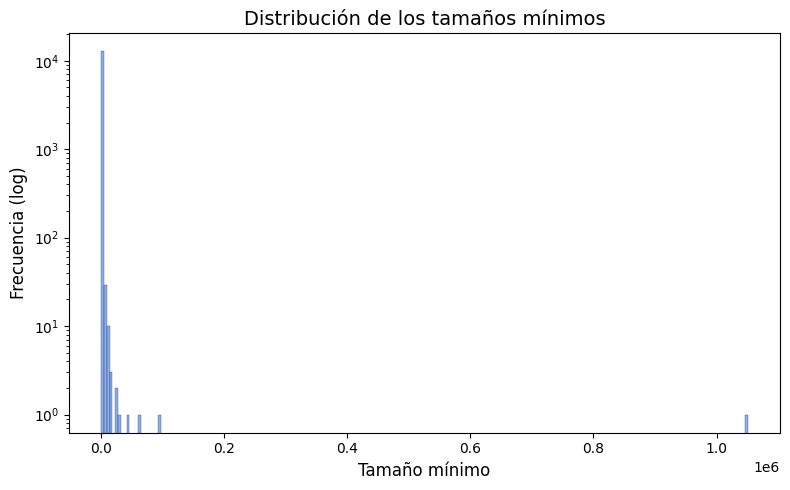

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(min_sizes, bins="auto", color='cornflowerblue')
plt.yscale("log")

plt.title("Distribución de los tamaños mínimos", fontsize=14)
plt.xlabel("Tamaño mínimo", fontsize=12)
plt.ylabel("Frecuencia (log)", fontsize=12)

plt.tight_layout()
plt.show()

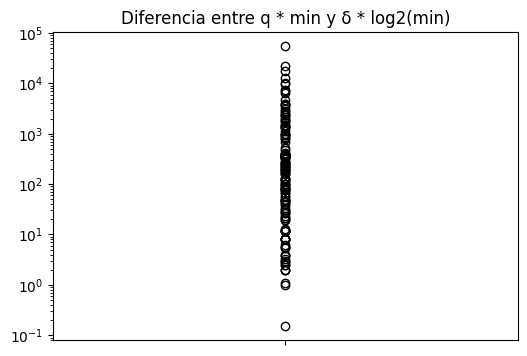

In [54]:
diff = df["q * min"] - df["δ * log2(min)"]

plt.figure(figsize=(6, 4))
plt.title("Diferencia entre q * min y δ * log2(min)")
diff.plot(kind="box");
plt.yscale("log")
plt.show();

## Análisis Global

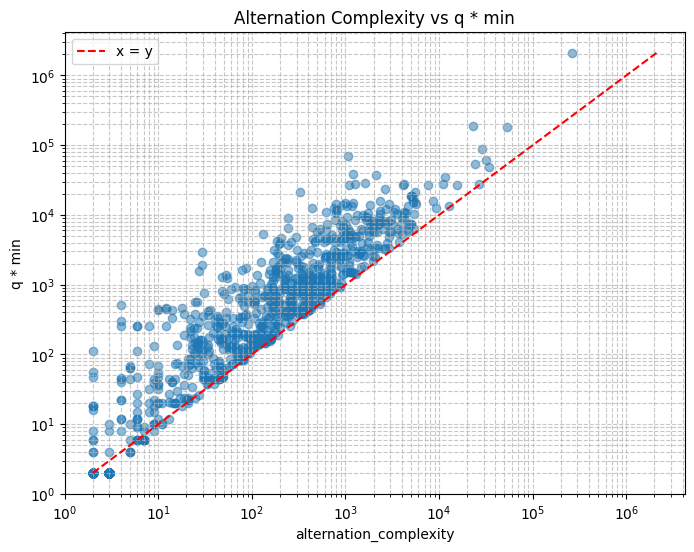

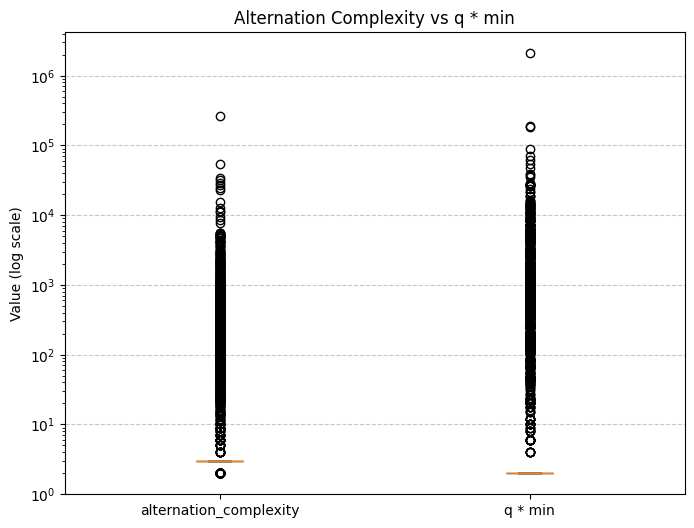

In [10]:
plot_scatter_alt_vs_min(df, x_col="alternation_complexity", y_col="q * min", title="Alternation Complexity vs q * min");
plot_boxplot_alt_vs_min(df, x_col="alternation_complexity", y_col="q * min", title="Alternation Complexity vs q * min");

## Análisis por Query

In [27]:
df_grouped = (
    df.drop("intersected_list_sizes", axis=1)
    .groupby("query_text")
    .agg({"alternation_complexity": "mean", "q * min": "mean", "δ * log2(min)": "mean", "δ * log2(max)": "mean"})
)

df_grouped.head()

,alternation_complexity,q * min,δ * log2(min),δ * log2(max)
query_text,,,,
?x 1 ?y . ?x 933 ?z . ?x 524 ?u,5229.0,15411.0,64456.0,137708.0
?x 1005 ?y . ?x 241 ?z,411.0,438.0,3195.0,6249.0
?x 1019 ?y . ?x 2053 ?z . ?x 1194 ?u . ?x 313 ?v,53.0,408.0,353.0,997.0
?x 1075 ?y . ?x 191 ?z,167.0,502.0,1331.0,1356.0
?x 1078 ?y . ?x 1245 ?z . ?x 1184 ?u,263.0,1056.0,2224.0,2884.0


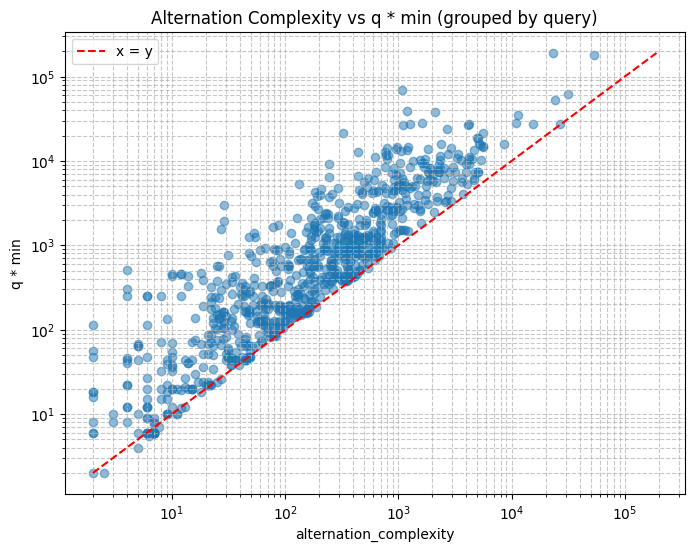

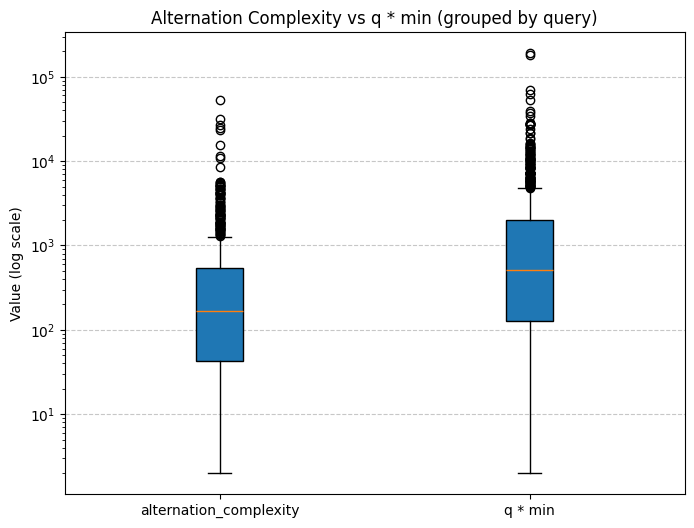

In [20]:
plot_scatter_alt_vs_min(df_grouped, x_col="alternation_complexity", y_col="q * min", title="Alternation Complexity vs q * min (grouped by query)");
plot_boxplot_alt_vs_min(df_grouped, x_col="alternation_complexity", y_col="q * min", title="Alternation Complexity vs q * min (grouped by query)");

## Comparar q * min con δ*log(n)

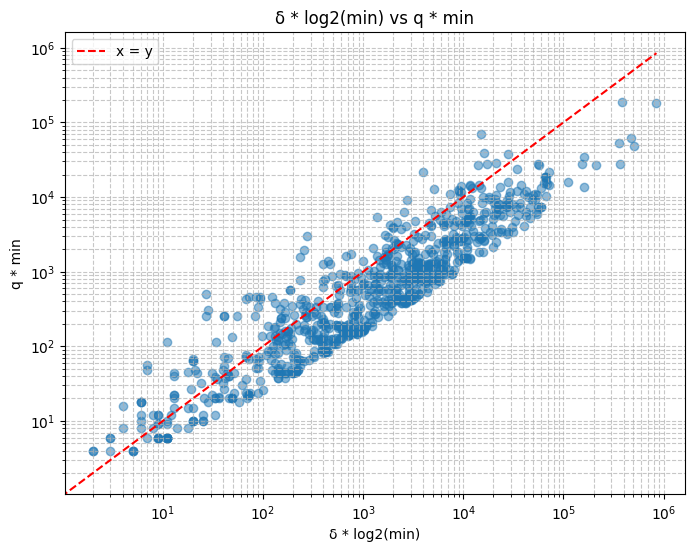

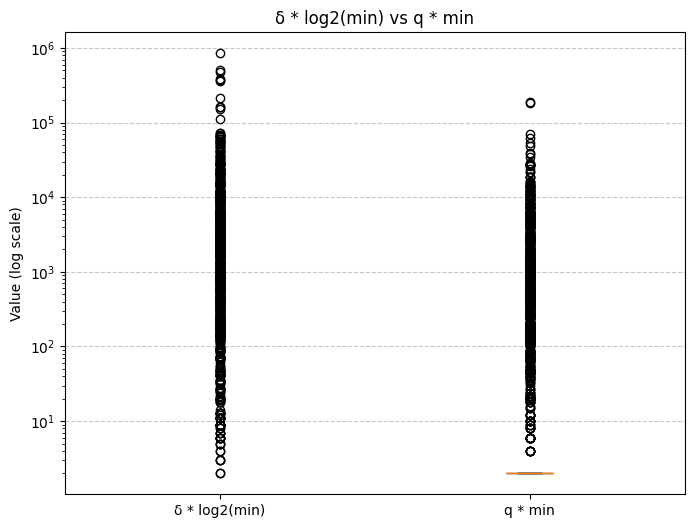

In [28]:
plot_scatter_alt_vs_min(df, x_col="δ * log2(min)", y_col="q * min", title="δ * log2(min) vs q * min");
plot_boxplot_alt_vs_min(df, x_col="δ * log2(min)", y_col="q * min", title="δ * log2(min) vs q * min");

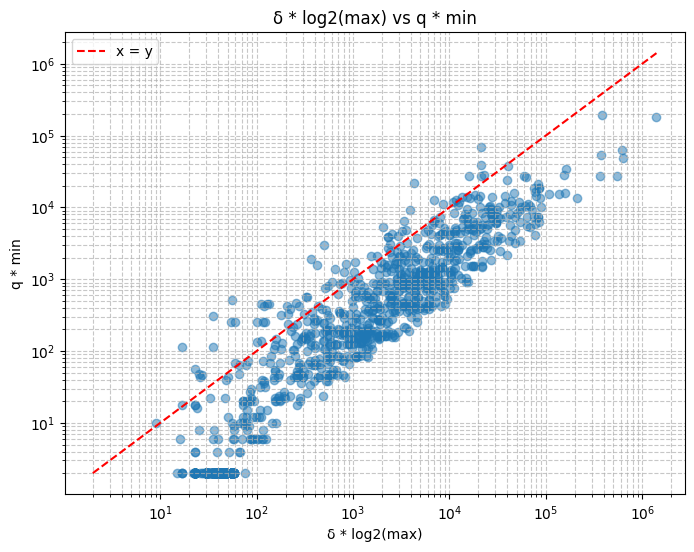

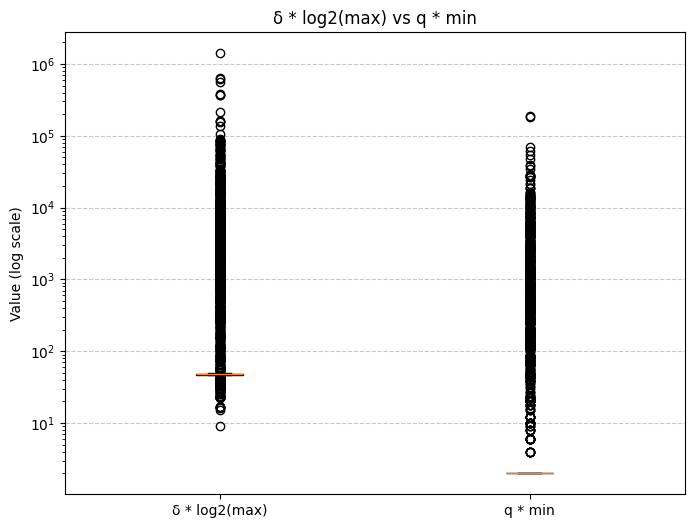

In [29]:
plot_scatter_alt_vs_min(df, x_col="δ * log2(max)", y_col="q * min", title="δ * log2(max) vs q * min");
plot_boxplot_alt_vs_min(df, x_col="δ * log2(max)", y_col="q * min", title="δ * log2(max) vs q * min");